In [ ]:
from google.colab import drive
drive.mount('/content/drive')

['Tumor', 'Notumor']
Found 54 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 18s 18s/step - loss: 0.9638 - accuracy: 0.5455
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.0473 - accuracy: 0.9545
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.0155 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.0222 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.9800e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.0060 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 7.1277e-04 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 1.8080e-04 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 2.0952e-04 - accuracy: 1.0000
Epoch 10/10
1/1 [=========

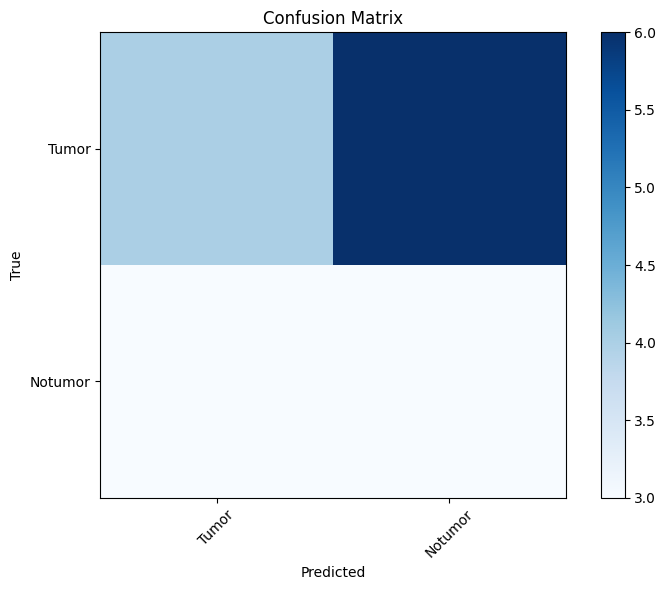

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense


# Define parameters
image_size = (150,150)
batch_size = 32
num_epochs = 10
train_data_dir = '/content/drive/MyDrive/brain_tumor/Training'
test_data_dir = '/content/drive/MyDrive/brain_tumor/Testing'

class_labels = os.listdir(train_data_dir)

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescale the pixel values for the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Create the CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 4
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layer 1 with 512 nodes
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

# Fully connected layer 2 with 256 nodes
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer with softmax activation for multi-class classification
model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
# model.save("braintumor.h5")

# Get the true labels and predicted labels
true_labels = test_generator.classes
predictions = model.predict(test_generator)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(true_labels, np.argmax(predictions, axis=-1))

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

plot_confusion_matrix(confusion_mtx, class_labels)
plt.show()

Found 54 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10


1/1 [==============================] - 119s 119s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 1.5371 - val_accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 26s 26s/step - loss: 2.5354 - accuracy: 0.4091 - val_loss: 0.7069 - val_accuracy: 0.3750
Epoch 3/10
1/1 [==============================] - 29s 29s/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.7212 - val_accuracy: 0.3750
Epoch 4/10
1/1 [==============================] - 38s 38s/step - loss: 0.6843 - accuracy: 0.5625 - val_loss: 0.7727 - val_accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 29s 29s/step - loss: 0.7372 - accuracy: 0.4545 - val_loss: 0.7366 - val_accuracy: 0.3750
Epoch 6/10
1/1 [==============================] - 28s 28s/step - loss: 0.6747 - accuracy: 0.5909 - val_loss: 0.7330 - val_accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 36s 36s/step - loss: 0.6845 - accuracy: 0.5625 - val_loss: 0.7342 - val_accuracy: 0.3750
Epoch 8/10
1/1 [====================

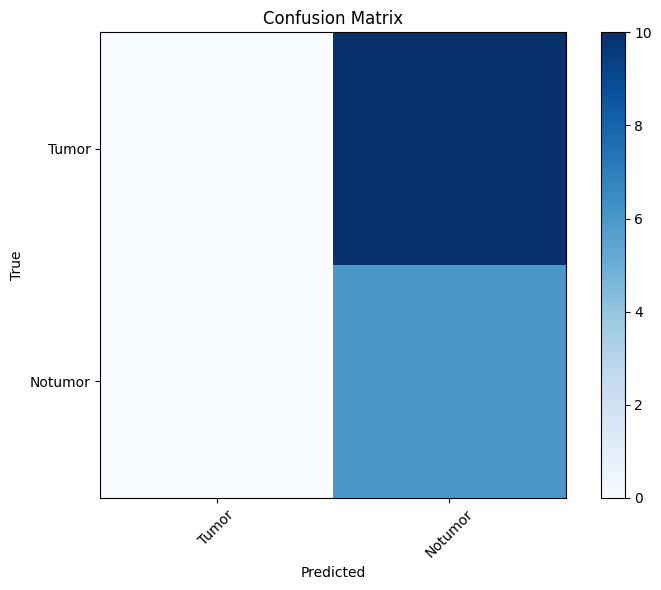

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Define parameters
image_size = (150, 150)
batch_size = 32
num_epochs = 10
train_data_dir = '/content/drive/MyDrive/brain_tumor/Training'
test_data_dir = '/content/drive/MyDrive/brain_tumor/Testing'

class_labels = os.listdir(train_data_dir)

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescale the pixel values for the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Create the VGG-like model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(image_size[0], image_size[1], 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

steps_per_epoch = train_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=1,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=1
)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Get the true labels and predicted labels
true_labels = test_generator.classes
predictions = model.predict(test_generator)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(true_labels, np.argmax(predictions, axis=-1))

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

plot_confusion_matrix(confusion_mtx, class_labels)
plt.show()


1/1 [==============================] - 0s 345ms/step
Predicted Class: Tumor
Probability: 0.9782


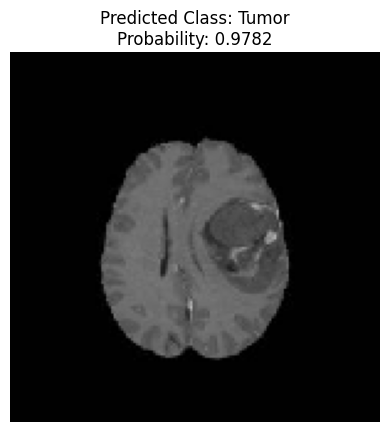

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt  # Add Matplotlib for image display
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define parameters
image_size = (150, 150)
model_path = '/content/drive/MyDrive/brain_tumor/braintumor.h5'

# Load the trained model
model = load_model(model_path)

# Function to predict if an image contains a brain tumor or not
def predict_brain_tumor(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=image_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Rescale the pixel values

    # Make predictions
    prediction = model.predict(img)

    # Class labels (assuming two classes: "No Tumor" and "Tumor")
    class_labels = ["No Tumor", "Tumor"]

    # Get the predicted class label and probability
    predicted_class = class_labels[np.argmax(prediction)]
    probability = prediction[0][np.argmax(prediction)]

    return predicted_class, probability, img

# Example usage:
image_path = '/content/drive/MyDrive/brain_tumor/Training/Tumor/Tr_T_23.jpg'
predicted_class, probability, img = predict_brain_tumor(image_path)

print(f'Predicted Class: {predicted_class}\nProbability: {probability:.4f}')
# Display the input image
plt.imshow(img[0])
plt.title(f'Predicted Class: {predicted_class}\nProbability: {probability:.4f}')
plt.axis('off')
plt.show()
